
**buliding AI App from Scratch *and*  Buliding AI App
for Hugging Face**

***------------------------------------------------------------------------------------------------------------------------------------------------------------***

# Buliding Sentiment Analysis App *Project 1*

**Introduction**

*The project is a sentiment analysis application utilizing the Sentiment140 dataset, which contains 1.6 million tweets. The objective is to classify tweets as positive or negative using the Multinomial Naive Bayes classification model. The project involves text preprocessing, feature extraction using TF-IDF, and training the model to achieve improved accuracy. Results are presented through an interactive Gradio interface that allows users to input a tweet and determine its sentiment. The project focuses on enhancing performance by tuning hyperparameters and optimizing data preprocessing* . Data Source: https://www.kaggle.com/datasets/kazanova/sentiment140


***Amar*** ***Ahmed***

**Data scientist** | **Machine Learning Developer** | **Computer Vision Researcher**

In [ ]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

file_path = os.path.join(path, 'training.1600000.processed.noemoticon.csv')

print("Path to dataset files:", file_path)
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
Data = pd.read_csv(file_path, encoding='latin-1', names=columns)
Data = Data.drop(columns=['ids','flag','user'])
Data

Path to dataset files: /kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


,target,date,text
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
!pip install gradio

In [ ]:
!pip install ydata_profiling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from ydata_profiling import ProfileReport
# Data
Sentiment_data = Data
sample_data = 20000
Sentiment_data = Sentiment_data.sample(n=sample_data, random_state=42)
Sentiment_data.head()

,target,date,text
541200,0,Tue Jun 16 18:18:12 PDT 2009,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,upper airways problem


In [ ]:
Sentiment_data.tail()

,target,date,text
1178000,4,Sun May 31 09:19:12 PDT 2009,Loving the weather Although we're not having ...
667014,0,Fri Jun 19 16:10:38 PDT 2009,Me and andrea r. last day of school..... http...
1451235,4,Sun Jun 07 01:05:46 PDT 2009,Just finished watching Your Song Presents: Boy...
1181413,4,Sun May 31 10:29:36 PDT 2009,@janfran813 awww i can't wait to get one
517910,0,Tue Jun 16 05:13:11 PDT 2009,"is indeed, a rather large hoarder of paper. &a..."


# EDA

In [ ]:
# Data Overview
display("Data size:", Sentiment_data.shape)
print('--------------------------------------------')
display("\n columns:", Sentiment_data.columns.tolist())
print('--------------------------------------------')
display("\n Data type:", Sentiment_data.dtypes)
print('--------------------------------------------')

'Data size:'

(20000, 3)

--------------------------------------------


'\n columns:'

['target', 'date', 'text']

--------------------------------------------


'\n Data type:'

,0
target,int64
date,object
text,object


--------------------------------------------


In [ ]:
Sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 541200 to 517910
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  int64 
 1   date    20000 non-null  object
 2   text    20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
Sentiment_data.isnull().sum().sum()

np.int64(0)

In [ ]:
Sentiment_data.duplicated().sum()

np.int64(0)

In [ ]:
# Descriptive analysis
Sentiment_data.describe()

,target
count,20000.000000
mean,2.011600
std,2.000016
min,0.000000
25%,0.000000
50%,4.000000
75%,4.000000
max,4.000000


In [ ]:
Sentiment_data.describe(include='object')

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: FutureWarning: Parsed string "Tue Jun 16 04:57:51 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,text
count,20000,20000
unique,19709,19982
top,Tue Jun 16 04:57:51 PDT 2009,isPlayer Has Died! Sorry
freq,3,4


In [ ]:
Sentiment_data['text'].value_counts()

,count
text,
isPlayer Has Died! Sorry,4
Good morning,3
Good morning!,3
Headache,3
Noshit party was great !! Working on a new track now .... and it's raining in Amsterdam,2
...,...
@DopeGirlFRESZH im goodie......you forgot all about me,1
hello everybody its monday again-.-' the week has just begon &gt;.&lt;,1
RIP my nameless fish.im really sad.fuck.,1


In [ ]:
Sentiment_data['target'].value_counts()

,count
target,
4,10058
0,9942


In [ ]:
# Full Report
ProfileReport(Sentiment_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:09<00:00,  3.13s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

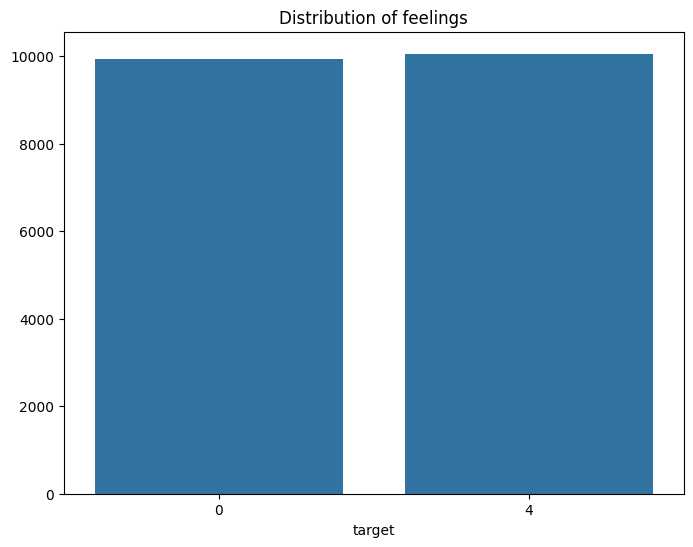

In [ ]:
sentiment_counts = Sentiment_data['target'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of feelings')
plt.show()

**Data clenning & Data preprocessing**



In [ ]:
def Data_clenning():
    global Sentiment_data
    Sentiment_data['date'] = pd.to_datetime(Sentiment_data['date'])
    # Drop Duplicated Value
    Sentiment_data = Sentiment_data.drop_duplicates()
    return Sentiment_data
Data_clenning()

<ipython-input-45-392c7706f50f>:3: FutureWarning: Parsed string "Tue Jun 16 18:18:12 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  Sentiment_data['date'] = pd.to_datetime(Sentiment_data['date'])


,target,date,text
541200,0,2009-06-16 18:18:12,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,2009-04-06 23:11:14,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2009-06-23 13:40:11,@TiannaChaos i know just family drama. its la...
285055,0,2009-06-01 10:26:07,School email won't open and I have geography ...
705995,0,2009-06-20 12:56:51,upper airways problem
...,...,...,...
1178000,4,2009-05-31 09:19:12,Loving the weather Although we're not having ...
667014,0,2009-06-19 16:10:38,Me and andrea r. last day of school..... http...
1451235,4,2009-06-07 01:05:46,Just finished watching Your Song Presents: Boy...
1181413,4,2009-05-31 10:29:36,@janfran813 awww i can't wait to get one


In [ ]:
Sentiment_data.duplicated().sum()

np.int64(0)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

Sentiment_data['cleaned_text'] = Sentiment_data['text'].apply(clean_text)

In [ ]:
Sentiment_data['cleaned_text']

,cleaned_text
541200,ahhh hope ok
750,cool tweet apps razr 2
766711,know family drama lamehey next time u hang kim...
285055,school email wont open geography stuff revise ...
705995,upper airways problem
...,...
1178000,loving weather although bbq evening apparently...
667014,andrea r last day school
1451235,finished watching song presents boystown
1181413,awww cant wait get one


# Data Visualization Whis *WordCloud PLOT*

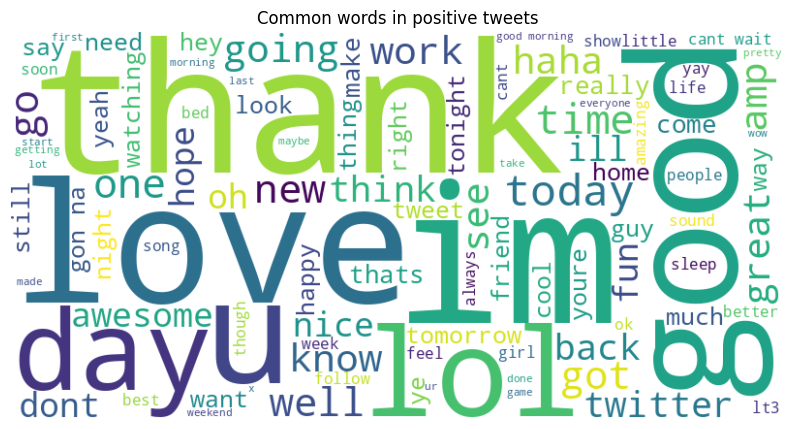

In [ ]:
from wordcloud import WordCloud
Sentiment_data['clean_text'] = Sentiment_data['text'].apply(clean_text)

positive_text = ' '.join(Sentiment_data[Sentiment_data['target'] == 4]['clean_text'])
negative_text = ' '.join(Sentiment_data[Sentiment_data['target'] == 0]['clean_text'])

from wordcloud import WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common words in positive tweets')
plt.show()


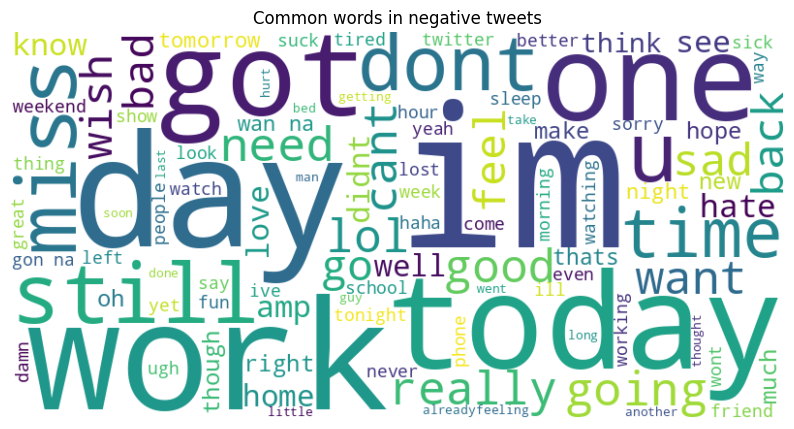

In [ ]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common words in negative tweets')
plt.show()

# Spliting Dataset

In [ ]:
X = Sentiment_data.drop(['text','date', 'target'], axis=1)
Y = Sentiment_data['target']

# TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=5, max_df=0.8)
X = vectorizer.fit_transform(X['cleaned_text'])

# shuffling
X, Y = shuffle(X, Y, random_state=42)

# spliting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
display("X_train shape:", X_train.shape)
display("X_test shape:", X_test.shape)
display("Y_train shape:", Y_train.shape)
display("Y_test shape:", Y_test.shape)


'X_train shape:'

(16000, 4622)

'X_test shape:'

(4000, 4622)

'Y_train shape:'

(16000,)

'Y_test shape:'

(4000,)

# Train Model

In [ ]:
import joblib
# Train Model
naivebayes_Model = MultinomialNB()
naivebayes_Model.fit(X_train, Y_train)

# Evaluate Model
train_score = naivebayes_Model.score(X_train, Y_train)
test_score = naivebayes_Model.score(X_test, Y_test)
print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)
# Save Model
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(naivebayes_Model, 'naivebayes_Model.pkl')

Training Accuracy: 0.808875
Testing Accuracy: 0.7275


['naivebayes_Model.pkl']

# cross validate Tools

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

# Model Check
cross_validate = cross_validate(naivebayes_Model,X, Y, cv=5)
display(cross_validate)
print('--------------------------------------------')
cross_val_score = cross_val_score(naivebayes_Model,X, Y, cv=5)
display(cross_val_score)

{'fit_time': array([0.0071733 , 0.0062983 , 0.00614071, 0.00604653, 0.00560999]),
 'score_time': array([0.00192022, 0.00188518, 0.00180125, 0.00179243, 0.00178337]),
 'test_score': array([0.7255 , 0.72325, 0.7255 , 0.73725, 0.7355 ])}

--------------------------------------------


array([0.7255 , 0.72325, 0.7255 , 0.73725, 0.7355 ])

# metrics Test

In [ ]:
# Predict Model
y_pred = naivebayes_Model.predict(X_test)
display("Predicted labels:", y_pred[0:5])
print('--------------------------------------------')
display("True labels:", Y_test[0:5])

'Predicted labels:'

array([4, 4, 4, 0, 0])

--------------------------------------------


'True labels:'

,target
962042,4
1315622,4
1021628,4
1560108,4
833507,4


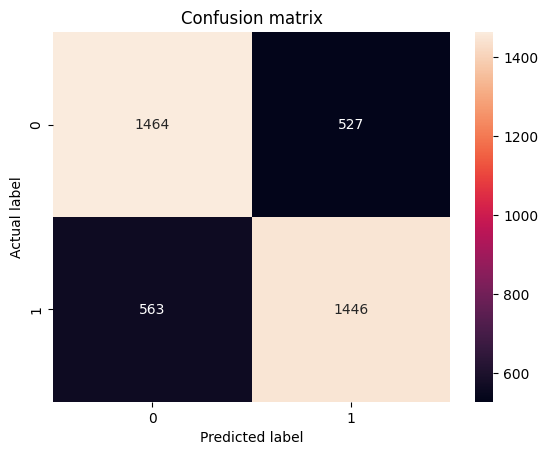

In [ ]:
confusion_matrix(Y_test, y_pred)

sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
Report  = classification_report(Y_test, y_pred)
print(Report)


              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1991
           4       0.73      0.72      0.73      2009

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



# Building Application for gradio

In [ ]:
import gradio as gr
import joblib
def predict(text):
    try:
        t = clean_text(text)
        if not t:
            return "Error: Empty text after cleaning"

        vectorizer = joblib.load('vectorizer.pkl')
        naiveModel = joblib.load('naivebayes_Model.pkl')

        text_vec = vectorizer.transform([t])

        res = naiveModel.predict(text_vec)[0]

        if res == 4:
            return "Positive"
        else:
            return "Negative"
    except Exception as e:
        return f"Error in predict: {str(e)}"

# Launch Gradio interface
gr.Interface(fn=predict, inputs="text", outputs="text").launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b59e1615bba8c4e818.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


***-------------------------------------------------------------------------------------------------------------------------------------------------------------***




# Buliding Sentiment Analysis Application Used Hugging Face *project 2*


In [ ]:
from transformers import pipeline

text_classifer = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
text = 'I Love You Computer Vision'
respone = text_classifer(text) # result
print(respone)

[{'label': 'Very Positive', 'score': 0.49558478593826294}]


In [ ]:
import gradio as gr
def predict(text):
  respone = text_classifer(text)[0]
  return respone['label'], respone['score']

gr.Interface(fn=predict, inputs="text", outputs=["text", "number"]).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f9dbca972edc78fe5e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# *Thank you for checking out this notebook❤️❤️!*